In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
# Read the CSV file
df = pd.read_csv('../cancer.csv')

# Display the first few rows
print(df.head())

  GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0      M   69        1               2        2              1   
1      M   74        2               1        1              1   
2      F   59        1               1        1              2   
3      M   63        2               2        2              1   
4      F   63        1               2        1              1   

   CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  COUGHING  \
0                1         2         1         2                  2         2   
1                2         2         2         1                  1         1   
2                1         2         1         2                  1         2   
3                1         1         1         1                  2         1   
4                1         1         1         2                  1         2   

   SHORTNESS OF BREATH  SWALLOWING DIFFICULTY  CHEST PAIN LUNG_CANCER  
0                    2                      

In [5]:
print("Null Values:\n", df.isnull().sum())


Null Values:
 GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64


In [6]:
print("Data Types:\n", df.dtypes)


Data Types:
 GENDER                   object
AGE                       int64
SMOKING                   int64
YELLOW_FINGERS            int64
ANXIETY                   int64
PEER_PRESSURE             int64
CHRONIC DISEASE           int64
FATIGUE                   int64
ALLERGY                   int64
WHEEZING                  int64
ALCOHOL CONSUMING         int64
COUGHING                  int64
SHORTNESS OF BREATH       int64
SWALLOWING DIFFICULTY     int64
CHEST PAIN                int64
LUNG_CANCER              object
dtype: object


In [7]:
df.columns = [col.strip().replace(" ", "_") for col in df.columns]


In [8]:
df['LUNG_CANCER'] = df['LUNG_CANCER'].map({'YES': 1, 'NO': 0})


In [9]:
print(df.head())


  GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0      M   69        1               2        2              1   
1      M   74        2               1        1              1   
2      F   59        1               1        1              2   
3      M   63        2               2        2              1   
4      F   63        1               2        1              1   

   CHRONIC_DISEASE  FATIGUE  ALLERGY  WHEEZING  ALCOHOL_CONSUMING  COUGHING  \
0                1        2        1         2                  2         2   
1                2        2        2         1                  1         1   
2                1        2        1         2                  1         2   
3                1        1        1         1                  2         1   
4                1        1        1         2                  1         2   

   SHORTNESS_OF_BREATH  SWALLOWING_DIFFICULTY  CHEST_PAIN  LUNG_CANCER  
0                    2                      2          

In [10]:
print(df.describe())


              AGE     SMOKING  YELLOW_FINGERS     ANXIETY  PEER_PRESSURE  \
count  309.000000  309.000000      309.000000  309.000000     309.000000   
mean    62.673139    1.563107        1.569579    1.498382       1.501618   
std      8.210301    0.496806        0.495938    0.500808       0.500808   
min     21.000000    1.000000        1.000000    1.000000       1.000000   
25%     57.000000    1.000000        1.000000    1.000000       1.000000   
50%     62.000000    2.000000        2.000000    1.000000       2.000000   
75%     69.000000    2.000000        2.000000    2.000000       2.000000   
max     87.000000    2.000000        2.000000    2.000000       2.000000   

       CHRONIC_DISEASE     FATIGUE     ALLERGY    WHEEZING  ALCOHOL_CONSUMING  \
count       309.000000  309.000000  309.000000  309.000000         309.000000   
mean          1.504854    1.673139    1.556634    1.556634           1.556634   
std           0.500787    0.469827    0.497588    0.497588           0.4

LUNG_CANCER
1    270
0     39
Name: count, dtype: int64


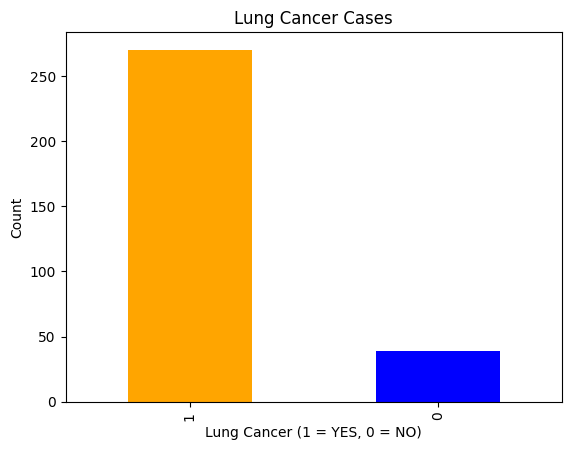

In [11]:
print(df['LUNG_CANCER'].value_counts())
df['LUNG_CANCER'].value_counts().plot(kind='bar', color=['orange', 'blue'])
plt.title("Lung Cancer Cases")
plt.xlabel("Lung Cancer (1 = YES, 0 = NO)")
plt.ylabel("Count")
plt.show()


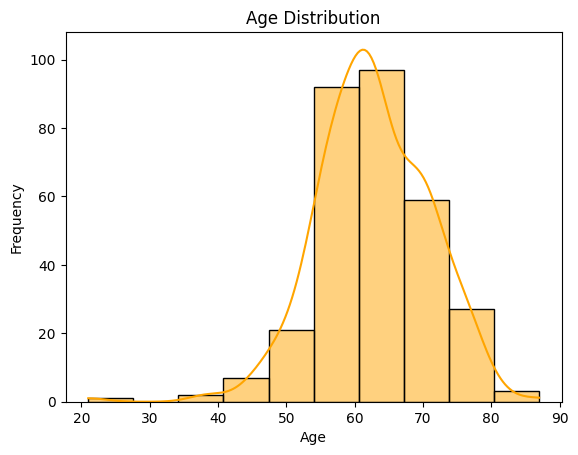

In [12]:
sns.histplot(df['AGE'], kde=True, bins=10, color='orange')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()



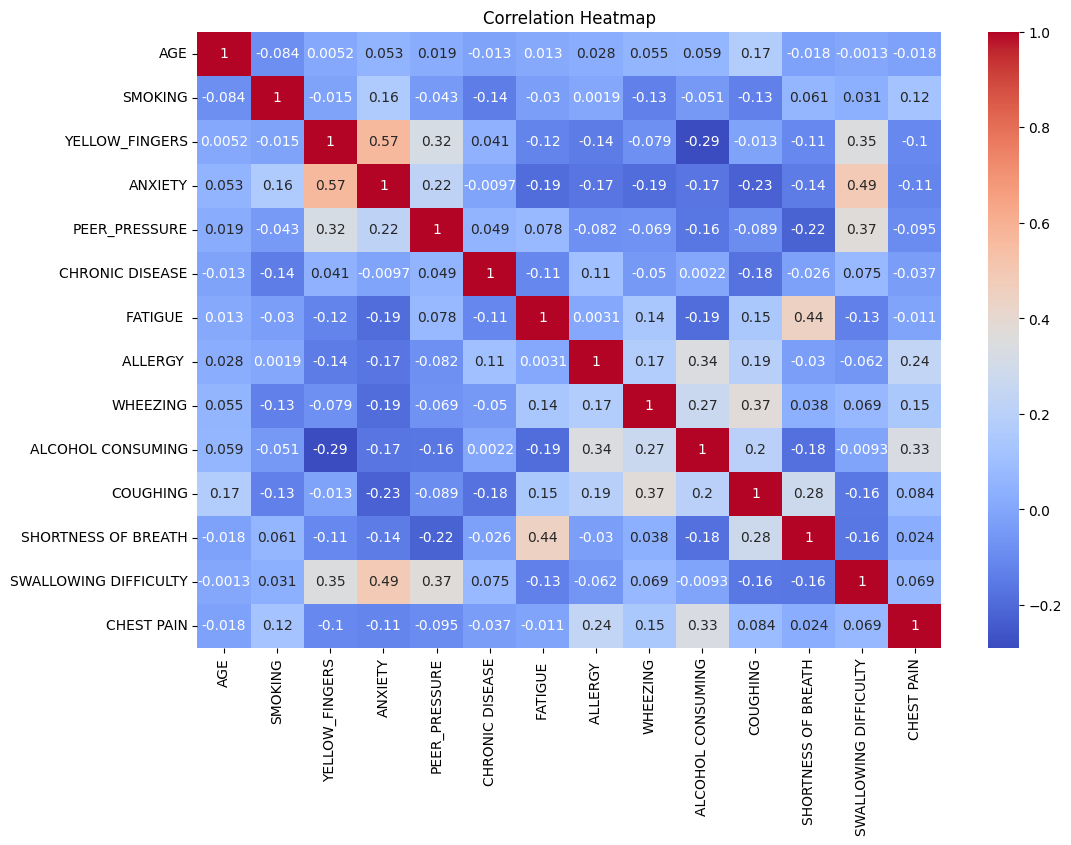

In [14]:
# Select only numeric columns
numeric_df = data.select_dtypes(include=[np.number])

# Generate the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


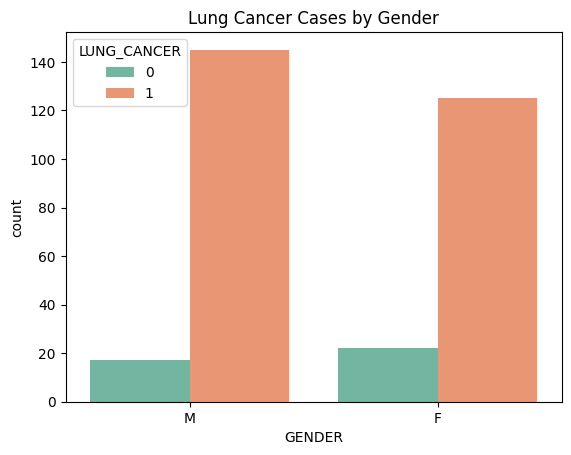

In [15]:
sns.countplot(x='GENDER', hue='LUNG_CANCER', data=df, palette='Set2')
plt.title("Lung Cancer Cases by Gender")
plt.show()


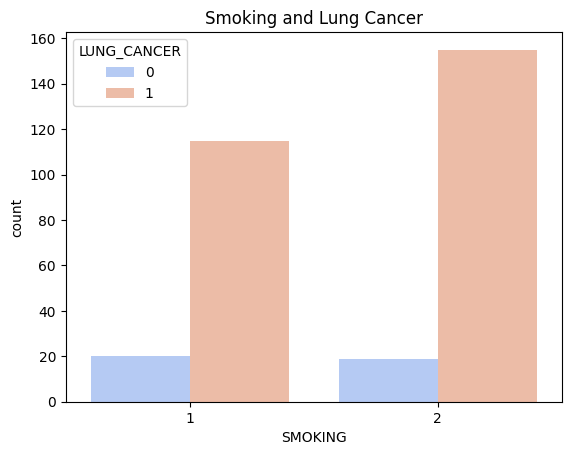

In [16]:
sns.countplot(x='SMOKING', hue='LUNG_CANCER', data=df, palette='coolwarm')
plt.title("Smoking and Lung Cancer")
plt.show()


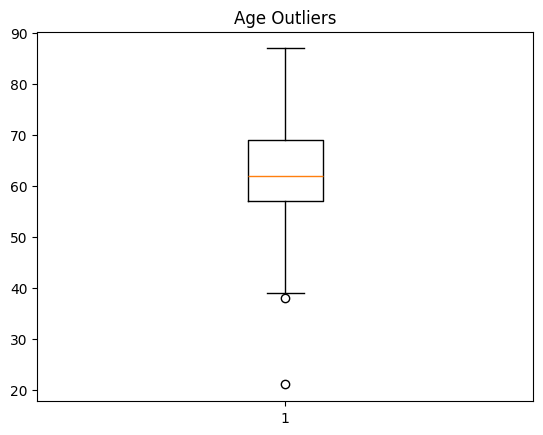

In [17]:
plt.boxplot(df['AGE'])
plt.title("Age Outliers")
plt.show()


In [18]:
Q1 = df['AGE'].quantile(0.25)
Q3 = df['AGE'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['AGE'] >= Q1 - 1.5 * IQR) & (df['AGE'] <= Q3 + 1.5 * IQR)]


In [19]:
X = df.drop('LUNG_CANCER', axis=1)
y = df['LUNG_CANCER']


In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


C:\Users\jkkar\AppData\Local\Temp\ipykernel_4972\1342645724.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='LUNG_CANCER', y='AGE', data=df, palette='autumn')


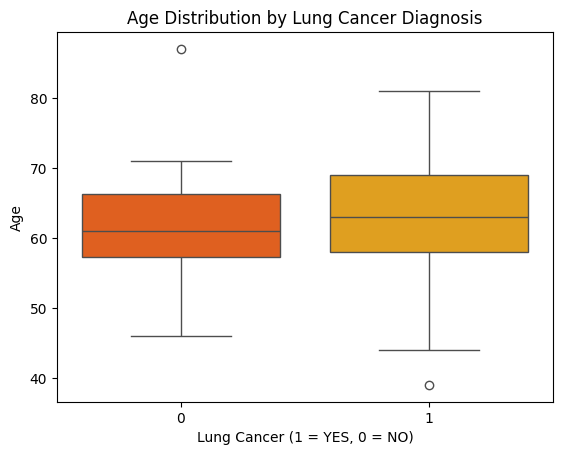

In [22]:
sns.boxplot(x='LUNG_CANCER', y='AGE', data=df, palette='autumn')
plt.title("Age Distribution by Lung Cancer Diagnosis")
plt.xlabel("Lung Cancer (1 = YES, 0 = NO)")
plt.ylabel("Age")
plt.show()



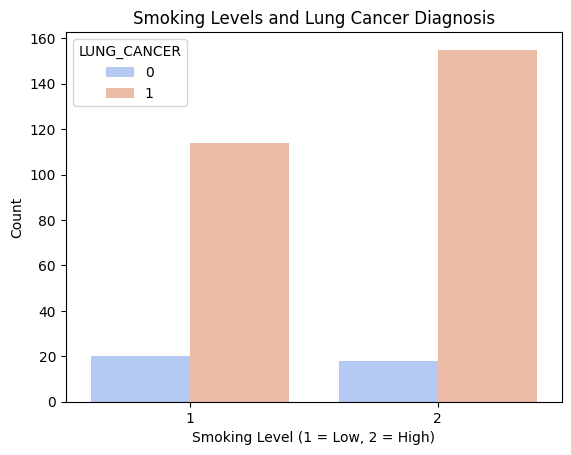

In [23]:
sns.countplot(x='SMOKING', hue='LUNG_CANCER', data=df, palette='coolwarm')
plt.title("Smoking Levels and Lung Cancer Diagnosis")
plt.xlabel("Smoking Level (1 = Low, 2 = High)")
plt.ylabel("Count")
plt.show()


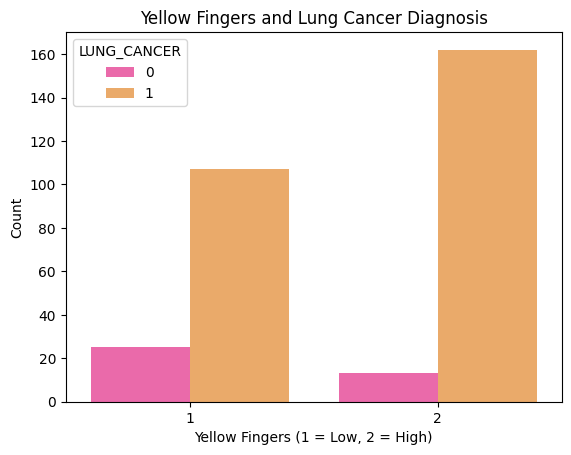

In [24]:
sns.countplot(x='YELLOW_FINGERS', hue='LUNG_CANCER', data=df, palette='spring')
plt.title("Yellow Fingers and Lung Cancer Diagnosis")
plt.xlabel("Yellow Fingers (1 = Low, 2 = High)")
plt.ylabel("Count")
plt.show()


C:\Users\jkkar\AppData\Local\Temp\ipykernel_4972\2847197168.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='ANXIETY', y='LUNG_CANCER', data=df, palette='magma')


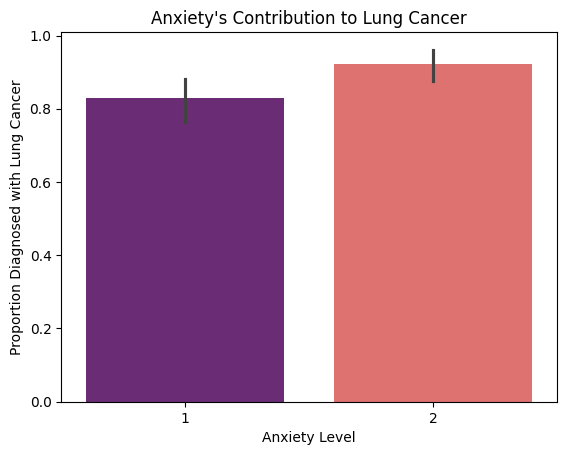

In [25]:
sns.barplot(x='ANXIETY', y='LUNG_CANCER', data=df, palette='magma')
plt.title("Anxiety's Contribution to Lung Cancer")
plt.xlabel("Anxiety Level")
plt.ylabel("Proportion Diagnosed with Lung Cancer")
plt.show()


C:\Users\jkkar\AppData\Local\Temp\ipykernel_4972\1878213734.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='PEER_PRESSURE', y='LUNG_CANCER', data=df, palette='viridis')


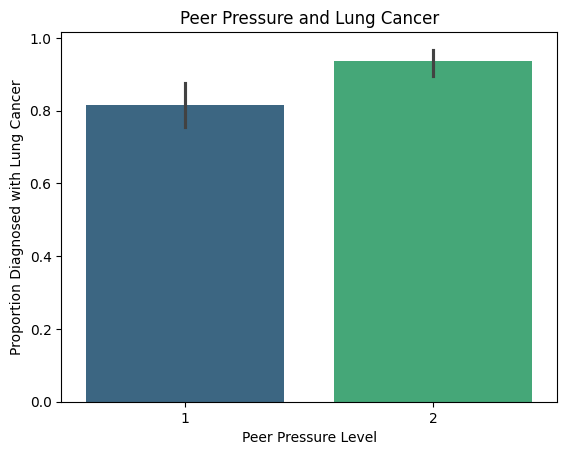

In [26]:
sns.barplot(x='PEER_PRESSURE', y='LUNG_CANCER', data=df, palette='viridis')
plt.title("Peer Pressure and Lung Cancer")
plt.xlabel("Peer Pressure Level")
plt.ylabel("Proportion Diagnosed with Lung Cancer")
plt.show()


C:\Users\jkkar\AppData\Local\Temp\ipykernel_4972\817522272.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='CHRONIC_DISEASE', y='LUNG_CANCER', data=df, palette='plasma')


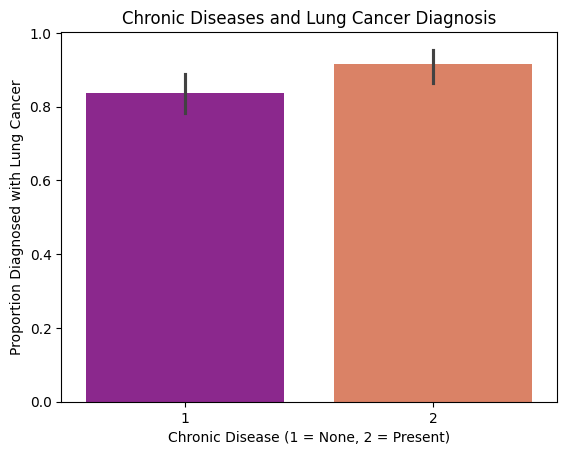

In [27]:
sns.barplot(x='CHRONIC_DISEASE', y='LUNG_CANCER', data=df, palette='plasma')
plt.title("Chronic Diseases and Lung Cancer Diagnosis")
plt.xlabel("Chronic Disease (1 = None, 2 = Present)")
plt.ylabel("Proportion Diagnosed with Lung Cancer")
plt.show()


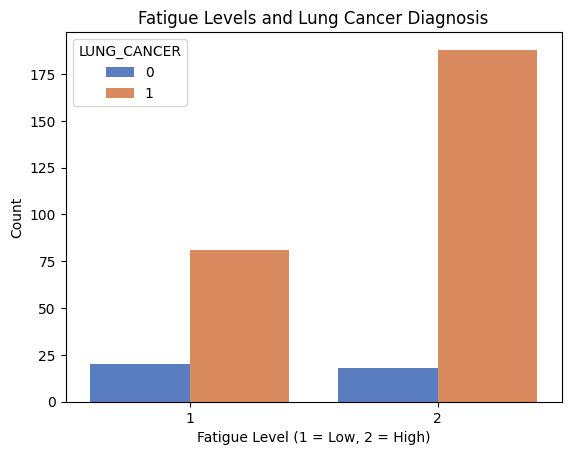

In [29]:
sns.countplot(x='FATIGUE', hue='LUNG_CANCER', data=df, palette='muted')
plt.title("Fatigue Levels and Lung Cancer Diagnosis")
plt.xlabel("Fatigue Level (1 = Low, 2 = High)")
plt.ylabel("Count")
plt.show()


C:\Users\jkkar\AppData\Local\Temp\ipykernel_4972\2530185026.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='COUGHING', y='LUNG_CANCER', data=df, palette='cool')


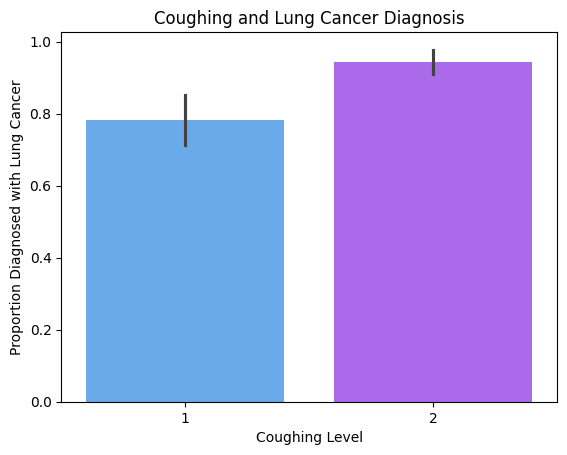

In [30]:
sns.barplot(x='COUGHING', y='LUNG_CANCER', data=df, palette='cool')
plt.title("Coughing and Lung Cancer Diagnosis")
plt.xlabel("Coughing Level")
plt.ylabel("Proportion Diagnosed with Lung Cancer")
plt.show()


C:\Users\jkkar\AppData\Local\Temp\ipykernel_4972\570820391.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='SHORTNESS_OF_BREATH', y='LUNG_CANCER', data=df, palette='inferno')


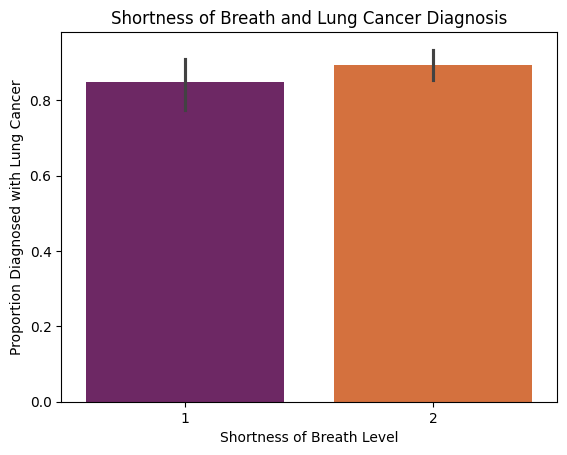

In [31]:
sns.barplot(x='SHORTNESS_OF_BREATH', y='LUNG_CANCER', data=df, palette='inferno')
plt.title("Shortness of Breath and Lung Cancer Diagnosis")
plt.xlabel("Shortness of Breath Level")
plt.ylabel("Proportion Diagnosed with Lung Cancer")
plt.show()


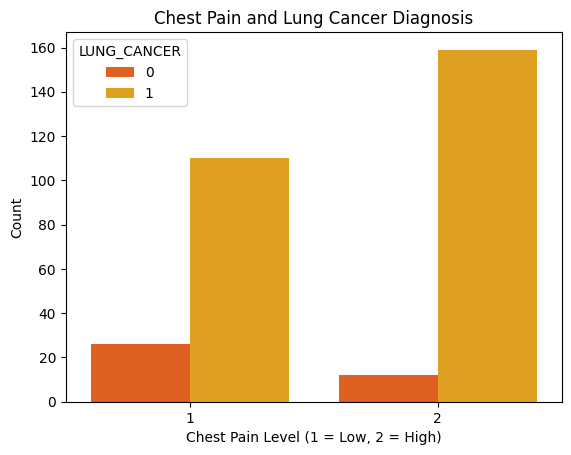

In [32]:
sns.countplot(x='CHEST_PAIN', hue='LUNG_CANCER', data=df, palette='autumn')
plt.title("Chest Pain and Lung Cancer Diagnosis")
plt.xlabel("Chest Pain Level (1 = Low, 2 = High)")
plt.ylabel("Count")
plt.show()


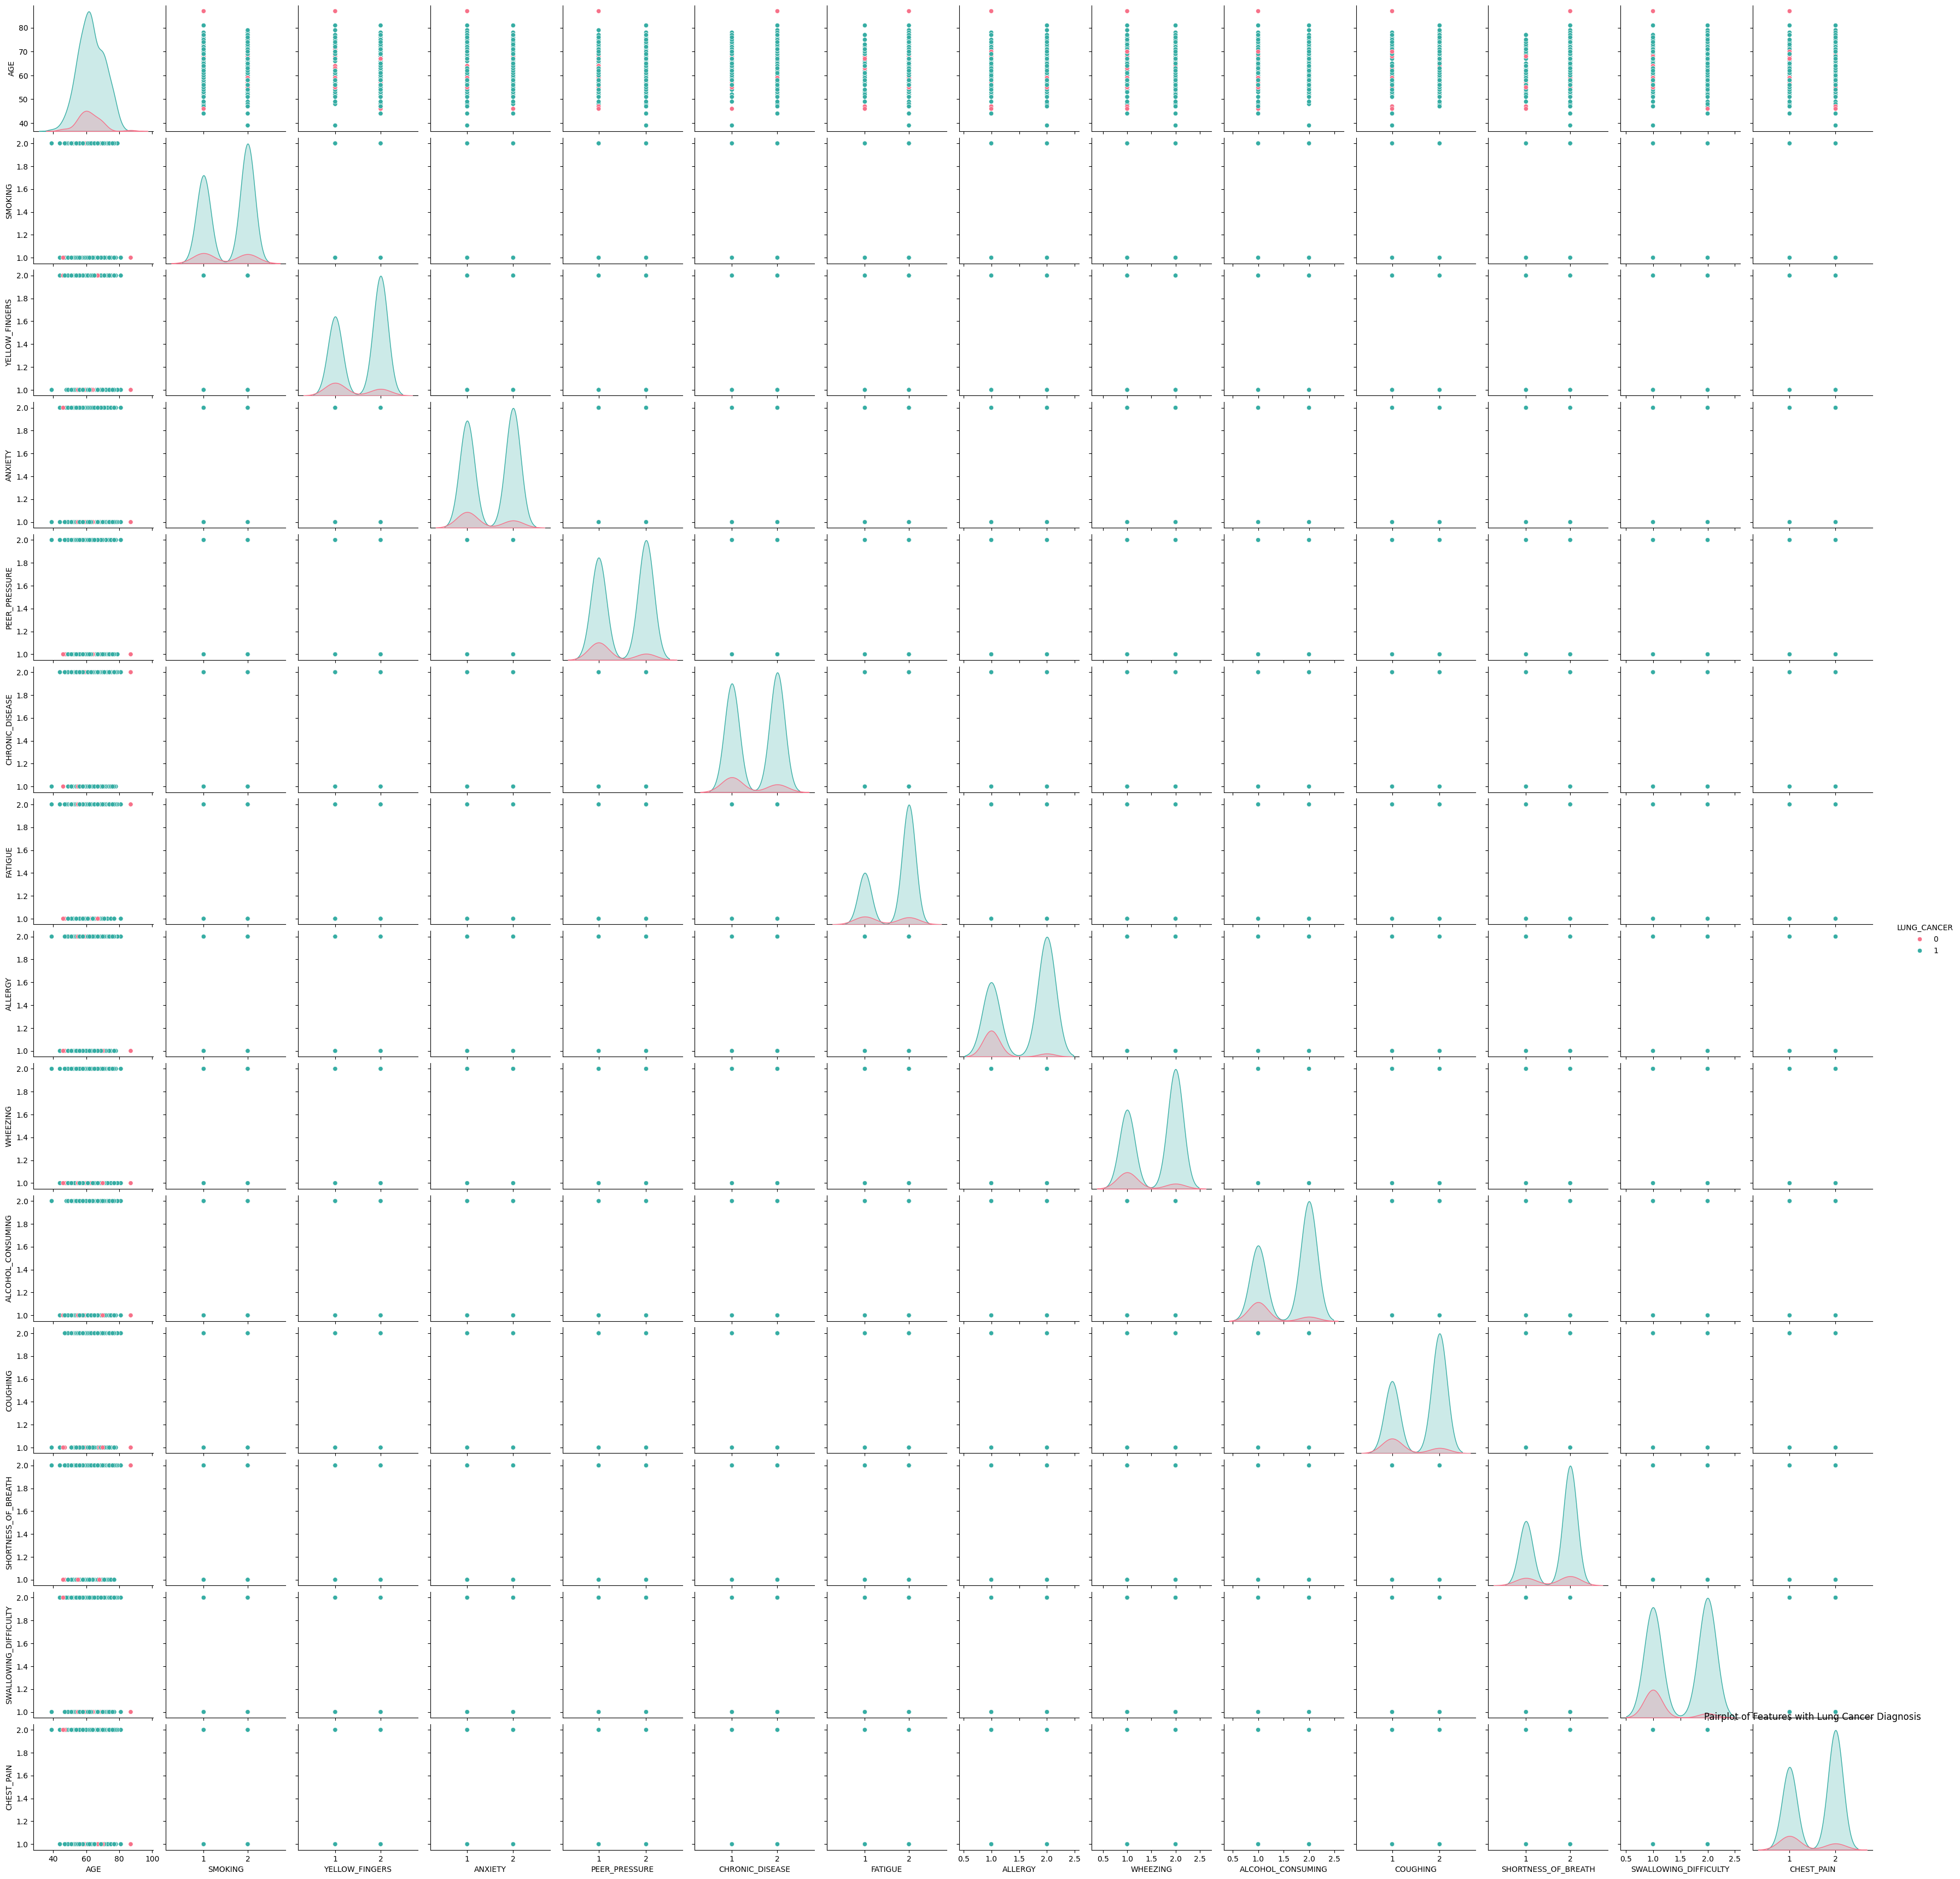

In [33]:
sns.pairplot(df, hue='LUNG_CANCER', diag_kind='kde', palette='husl')
plt.title("Pairplot of Features with Lung Cancer Diagnosis")
plt.show()
